In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
bhphoto_df = pd.read_csv("../../../data/raw/raw_bhp.csv")
bhphoto_df.head(2)

,Name,Operating-System,Processor,GPU,Total-Installed-Memory,Display-Size,Resolution,Touch-Screen,Total-Installed-Capacity,Inputs/Outputs,...,Batery-Chemistry,Capacity,Keyboard,Power-Supply,Operating-Tempurature,Operating-Humidity,Dimensions,Package-Weight,Box-Dimension (LxWxH),Price
0,"ASUS 13.3"" Zenbook S 13 OLED Laptop (Basalt Gray)",Windows 11 Pro,Intel Core i7-1355U (13th Gen),Intel Iris Xe,32 GB,"13.3""",2880 x 1800,No,1 TB,1 x USB-A 3.1/3.2 Gen 22 x USB-C (Thunderbolt ...,...,NaN,4-Cell: 63 Wh,NaN,65 W with USB-C,-60 to 160 F / -51 to 71 C,95%,"11.66 x 8.52 x 0.46"" / 29.62 x 21.63 x 1.18 cm",5.895 lb,"17.8 x 11.1 x 4""","$1,299.99"
1,"ASUS 15.6"" Vivobook S 15 OLED Laptop (Midnight...",Windows 11 Home,Intel Core i9-13900H (13th Gen),Intel Iris Xe,16 GB,"15.6""",2880 x 1620,No,1 TB,1 x USB-A 3.0 / 3.1/3.2 Gen 11 x USB-A 2.01 x ...,...,NaN,4-Cell: 75 Wh,NaN,65 W with Barrel/Proprietary,-6 to 109 F / -21 to 43 C,95%,"14.15 x 9.03 x 0.7"" / 35.93 x 22.94 x 1.79 cm",5.905 lb,"18.2 x 11.6 x 2.4""",$989.99


In [6]:
amazon_df = pd.read_csv("../../../data/processed/amz_dataset.csv")
amazon_df.drop(amazon_df.columns[0], axis=1, inplace=True)
amazon_df.head()

,Brand,CPU Name,CPU Mark,GPU Name,GPU Mark,Monitor,Width,Height,RAM,Storage Amount,OS,Weight,Price
0,MSI,Intel Core i7 13620H,26454,GeForce RTX 4050 Laptop GPU,14691,15.6,1920,1080,16.0,2048.0,Windows 11,3.03,1529.00
1,Dell,Intel Core i9 12900,34306,GeForce RTX 4060,19560,15.6,1366,768,16.0,4000.0,Windows 11,3.64,2308.81
2,Dell,Intel Core i5 2310 2.90GHz,3642,Intel Arc,4253,14.0,1920,1080,8.0,256.0,Windows 10,1.23,614.99
3,Dell,Intel Core i7 1360P,19333,Intel Iris Xe,2690,16.0,1920,1200,24.0,1024.0,Windows 10,1.58,1079.00
4,Dell,Intel Core i7 13700H,28003,Intel Arc A730M,8274,15.6,1920,1200,32.0,1024.0,Windows 10,1.92,1907.00


In [7]:
newegg_df = pd.read_csv("../../../data/raw/raw_nwg.csv")
newegg_df.drop(newegg_df.columns[0], axis=1, inplace=True)
newegg_df.head()

,Brand,CPU,GPU,RAM,Monitor,Resolution,Storage,OS,Weight,Price,CPU Name,GPU Name,CPU Mark,GPU Mark
0,Lenovo,intel core i7 13th gen 1355u (1.70ghz),intel iris xe graphics,16 GB,16 Inches,1920 x 1200,1TB SSD,Windows 11 Home,4.17 lbs.,699.99,Intel Core i7 1355U,Intel Iris Xe,15287.0,2690.0
1,Acer,intel core i7 13th gen 1355u (1.70ghz),intel iris xe graphics,16 GB,15.6 Inches,1920x1080,512GB SSD,Windows 11 Home,3.92 lbs.,699.99,Intel Core i7 1355U,Intel Iris Xe,15287.0,2690.0
2,MSI,amd ryzen 5-7530u,radeon graphics,16GB,14 Inches,1920x1080,512GB SSD,Windows 11 Home,3.75 lbs.,399.00,AMD Ryzen 5 7530U,Radeon Ryzen 5 4600GE with Radeon Graphics,16506.0,1792.0
3,Acer,intel celeron n4500 (1.10ghz),intel uhd graphics,4GB,14.0 Inches,1366 x 768,128GB SSD,Chrome OS,NaN,229.99,Intel Celeron N4500 1.10GHz,Intel UHD Graphics,2003.0,1476.0
4,MSI,intel core i9 13th gen 13950hx (2.20ghz),rtx 2000 ada,32GB,16 Inches,2560 x 1600,1TB NVMe SSD,Windows 11 Pro 64-bit,NaN,2891.46,Intel Core i9 13950HX,RTX 2000 Ada Generation Laptop GPU,44905.0,15597.0


In [8]:
pd.set_option('display.max_rows', None)

In [12]:
amz_brands = amazon_df["Brand"].value_counts()
amazon_df["Brand"] = amazon_df["Brand"].apply(lambda x: x.lower())

In [13]:
brands_less_than_4 = amz_brands[amz_brands < 4].index.tolist()
amazon_df["Brand"] = amazon_df["Brand"].replace(brands_less_than_4, "other")
amazon_df["Brand"] = amazon_df["Brand"].replace("rokc", "other")
amazon_df["Brand"].value_counts()

dell              1461
hp                 615
lenovo             547
acer               442
asus               411
msi                239
lg                  68
other               49
samsung             41
microsoft           28
panasonic           24
gigabyte            22
best notebooks      12
apple                9
Name: Brand, dtype: int64

In [24]:
nwg_brands = newegg_df["Brand"].value_counts()
newegg_df["Brand"] = newegg_df["Brand"].apply(lambda x: x.lower())
brands_less_than_4 = nwg_brands[nwg_brands < 7].index.tolist()
newegg_df["Brand"] = newegg_df["Brand"].replace(brands_less_than_4, "other")
newegg_df["Brand"].value_counts()

lenovo       1143
hp           1049
dell          614
asus          390
acer          301
msi           291
microsoft     104
lg             44
other          43
samsung        36
gigabyte        8
Name: Brand, dtype: int64

In [27]:
bhphoto_df["Brand"] = bhphoto_df["Name"].str.split().apply(lambda x: x[0])
bhphoto_df = bhphoto_df.drop("Name", axis=1)

In [29]:
bhp_brands = bhphoto_df["Brand"].value_counts()
bhphoto_df["Brand"] = bhphoto_df["Brand"].apply(lambda x: x.lower())
brands_less_than_4 = bhp_brands[bhp_brands <= 4].index.tolist()
bhphoto_df["Brand"] = bhphoto_df["Brand"].replace(brands_less_than_4, "other")
bhphoto_df["Brand"].value_counts()

apple        349
hp           313
lenovo       302
dell         155
microsoft     80
lg            61
msi           29
acer          27
asus          25
panasonic     24
samsung       21
razer         16
gigabyte      11
other          7
Name: Brand, dtype: int64

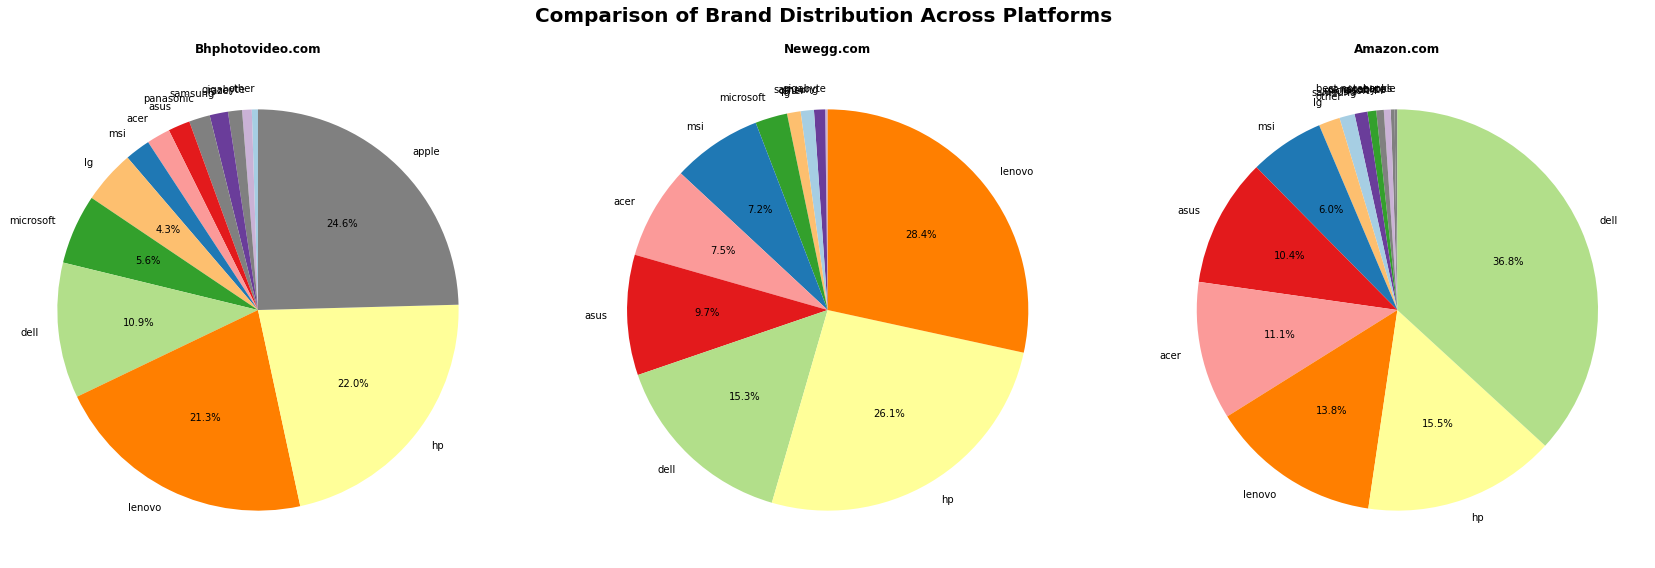

In [30]:
bhp_counts = bhphoto_df["Brand"].value_counts(ascending=True)
nwg_counts = newegg_df["Brand"].value_counts(ascending=True)
amz_counts = amazon_df["Brand"].value_counts(ascending=True)

common_labels = set(bhp_counts.index) & set(nwg_counts.index) & set(amz_counts.index)
common_labels = list(common_labels)
colors = [plt.cm.Paired.colors[i % len(plt.cm.Paired.colors)] for i, label in enumerate(common_labels)]

fig, axes = plt.subplots(1, 3, figsize=(24, 8), facecolor='white')

# Bhphotovideo.com
axes[0].pie(bhp_counts, labels=bhp_counts.index, autopct=lambda p: '{:.1f}%'.format(p) if p > 4 else '', startangle=90, colors=[colors[common_labels.index(label)] if label in common_labels else 'gray' for label in bhp_counts.index])
axes[0].set_title('Bhphotovideo.com', fontweight='bold')

# Newegg.com
axes[1].pie(nwg_counts, labels=nwg_counts.index, autopct=lambda p: '{:.1f}%'.format(p) if p > 4 else '', startangle=90, colors=[colors[common_labels.index(label)] if label in common_labels else 'gray' for label in nwg_counts.index])
axes[1].set_title('Newegg.com', fontweight='bold')

# Amazon.com
axes[2].pie(amz_counts, labels=amz_counts.index, autopct=lambda p: '{:.1f}%'.format(p) if p > 4 else '', startangle=90, colors=[colors[common_labels.index(label)] if label in common_labels else 'gray' for label in amz_counts.index])
axes[2].set_title('Amazon.com', fontweight='bold')

# Tiêu đề chung cho figure
plt.suptitle('Comparison of Brand Distribution Across Platforms', fontsize=20, fontweight='bold')

# Hiển thị biểu đồ
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


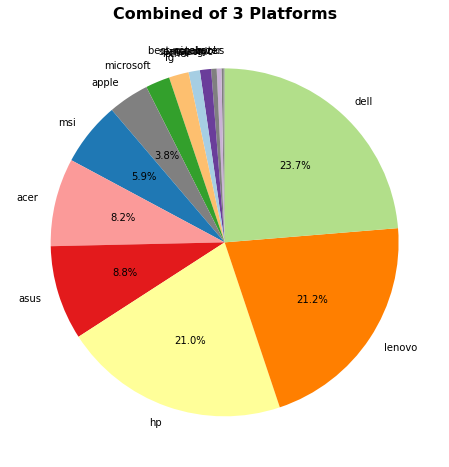

In [31]:
# combine
plt.figure(figsize=(8,8), facecolor='white')
combined_counts = bhp_counts.add(nwg_counts, fill_value=0).add(amz_counts, fill_value=0).sort_values(ascending=True)
combined_colors = [colors[common_labels.index(label)] if label in common_labels else 'gray' for label in combined_counts.index]
plt.pie(combined_counts, labels=combined_counts.index, autopct=lambda p: '{:.1f}%'.format(p) if p > 3 else '', startangle=90, colors=combined_colors)
plt.title('Combined of 3 Platforms', fontsize=16, fontweight='bold')
plt.show()

## Merge Data of 3 Platforms

|Colum|Dtype|Example|
|-|-|-|
|Brand|object|apple, dell, lenovo, hp...|
|CPU Brand|object|intel, amd...|
|GPU Brand|object|intel, geforce...|
|CPU Mark|float64|2685.0, 15846.0|
|GPU Mark|float64||
|Monitor|float64|14.0, 15.6...|
|Width|int32|1920,...|
|Height|int32||
|RAM|int32|4,8,64... `GB`|
|Storage Amount|int32|`GB`|
|OS|object|Windows 11, Windows 10,...|
|Weight|float64|1.64,..`kg`|
|Price|float64|`target`|

In [65]:
amz_df = amazon_df
nwg_df = newegg_df
bhp_df = bhphoto_df

In [66]:
amz_df.drop_duplicates(inplace=True)
amz_df["Price"].describe()

count    3828.00000
mean     1171.52372
std       751.91595
min        99.00000
25%       619.00000
50%      1019.00000
75%      1549.00000
max      6599.00000
Name: Price, dtype: float64

In [67]:
nwg_df.drop_duplicates(inplace=True)
nwg_df["Price"].describe()

count    3891.000000
mean     1053.603673
std       685.057361
min        12.000000
25%       619.990000
50%       887.090000
75%      1279.990000
max      8999.990000
Name: Price, dtype: float64

#### Handle data of Amazon.com

In [68]:
amz_df.isna().sum()

Brand             0
CPU Name          0
CPU Mark          0
GPU Name          0
GPU Mark          0
Monitor           0
Width             0
Height            0
RAM               0
Storage Amount    0
OS                0
Weight            0
Price             0
CPU Brand         0
GPU Brand         0
dtype: int64

In [69]:
amz_df["CPU Brand"] = amz_df["CPU Name"].str.split().apply(lambda x: x[0].lower())
amz_df["GPU Brand"] = amz_df["GPU Name"].str.split().apply(lambda x: x[0].lower())

In [86]:
amz_df = amz_df[amz_df["CPU Brand"].isin(["intel", "amd", "apple"])]

In [70]:
amz_df = amz_df[amz_df["Monitor"] > 6]

In [71]:
amz_df = amz_df[amz_df["Width"] > 1360]

In [82]:
amz_df = amz_df[amz_df["Storage Amount"] > 8]

In [115]:
id = amz_df["GPU Brand"].value_counts()
amz_df = amz_df[amz_df["GPU Brand"].isin(id[id>5].index.tolist())]

In [119]:
id1 = amz_df["OS"].value_counts()
amz_df = amz_df[amz_df["OS"].isin(id1[id1>5].index.tolist())]

In [120]:
amz_df.head(2)

,Brand,CPU Name,CPU Mark,GPU Name,GPU Mark,Monitor,Width,Height,RAM,Storage Amount,OS,Weight,Price,CPU Brand,GPU Brand
0,msi,Intel Core i7 13620H,26454,GeForce RTX 4050 Laptop GPU,14691,15.6,1920,1080,16.0,2048.0,Windows 11,3.03,1529.00,intel,geforce
1,dell,Intel Core i9 12900,34306,GeForce RTX 4060,19560,15.6,1366,768,16.0,4000.0,Windows 11,3.64,2308.81,intel,geforce


In [121]:
amz_df.describe()

,CPU Mark,GPU Mark,Monitor,Width,Height,RAM,Storage Amount,Weight,Price
count,3769.000000,3769.000000,3769.000000,3769.000000,3769.000000,3769.000000,3.769000e+03,3769.000000,3769.000000
mean,16044.433802,7795.781109,15.298780,1986.649244,1150.281772,21.134253,1.211453e+03,2.242993,1178.501494
std,10562.614159,7760.049427,1.240717,469.970983,299.782915,22.836712,1.669209e+04,1.734763,752.547259
min,101.000000,2.000000,7.000000,1366.000000,600.000000,2.000000,1.600000e+01,0.000000,99.000000
25%,7773.000000,1509.000000,14.000000,1920.000000,1080.000000,8.000000,5.120000e+02,1.640000,625.000000
50%,15287.000000,4253.000000,15.600000,1920.000000,1080.000000,16.000000,5.120000e+02,2.010000,1028.580000
75%,23728.000000,12961.000000,16.000000,1920.000000,1200.000000,32.000000,1.024000e+03,2.560000,1549.000000
max,61425.000000,38874.000000,18.000000,3840.000000,2400.000000,1024.000000,1.024000e+06,59.090000,6599.000000


In [130]:
formated_columns = ["Brand", "CPU Brand", "GPU Brand", "CPU Mark", "GPU Mark", "Monitor", "Width", "Height", "RAM", "Storage Amount", "OS", "Weight", "Price"]
new_amz_df = pd.DataFrame()
for col in formated_columns:
    new_amz_df[col] = amz_df[col]

new_amz_df.head(3)

,Brand,CPU Brand,GPU Brand,CPU Mark,GPU Mark,Monitor,Width,Height,RAM,Storage Amount,OS,Weight,Price
0,msi,intel,geforce,26454,14691,15.6,1920,1080,16.0,2048.0,Windows 11,3.03,1529.00
1,dell,intel,geforce,34306,19560,15.6,1366,768,16.0,4000.0,Windows 11,3.64,2308.81
2,dell,intel,intel,3642,4253,14.0,1920,1080,8.0,256.0,Windows 10,1.23,614.99


In [131]:
new_amz_df.to_csv("processed_amz.csv")

#### Handle data of Newegg.com

In [186]:
nwg_df = newegg_df

In [187]:
nwg_df.isna().sum()

Brand            0
CPU              0
GPU              0
RAM              0
Monitor          0
Resolution       0
Storage          0
OS               0
Weight        2126
Price            0
CPU Name         0
GPU Name         0
CPU Mark         0
GPU Mark         0
CPU Brand        0
dtype: int64

In [188]:
nwg_df.dropna(subset=['GPU Name'], inplace=True)

In [189]:
nwg_df["CPU Brand"] = nwg_df["CPU Name"].str.split().apply(lambda x: x[0].lower())

In [190]:
id3 = nwg_df["CPU Brand"].value_counts()
nwg_df = nwg_df[nwg_df["CPU Brand"].isin(id3[id3 > 8].index)]

In [191]:
nwg_df["GPU Brand"] = nwg_df["GPU Name"].str.split().apply(lambda x: x[0].lower())

C:\Users\DELL\AppData\Local\Temp\ipykernel_3296\1654010902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nwg_df["GPU Brand"] = nwg_df["GPU Name"].str.split().apply(lambda x: x[0].lower())


In [192]:
id4 = nwg_df["GPU Brand"].value_counts()
nwg_df = nwg_df[nwg_df["GPU Brand"].isin(id4[id4 > 8].index)]

In [193]:
nwg_df.replace("256mb", "rageon", inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_3296\1309166988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nwg_df.replace("256mb", "rageon", inplace=True)


In [194]:
nwg_df["GPU Brand"] = nwg_df["GPU Brand"].replace({
    "t550": "t500",
    "t400": "t500",
    "t600": "t500",
    "t1000": "t500"
})

C:\Users\DELL\AppData\Local\Temp\ipykernel_3296\2463996835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nwg_df["GPU Brand"] = nwg_df["GPU Brand"].replace({


In [195]:
import re

In [196]:
def extract_ram_size(ram_str):
    match = re.search(r'\b(\d+)\s*GB\b', str(ram_str))
    if match:
        return int(match.group(1))
    else:
        return None

nwg_df["RAM"] = nwg_df["RAM"].apply(extract_ram_size)
nwg_df["RAM"].value_counts()

C:\Users\DELL\AppData\Local\Temp\ipykernel_3296\3318691330.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nwg_df["RAM"] = nwg_df["RAM"].apply(extract_ram_size)


16.0     1663
8.0       940
32.0      637
4.0       221
12.0      127
64.0      123
20.0       60
24.0       31
40.0       19
36.0       10
256.0       9
6.0         2
48.0        1
128.0       1
512.0       1
2.0         1
11.0        1
Name: RAM, dtype: int64

In [197]:
nwg_df.head(2)

,Brand,CPU,GPU,RAM,Monitor,Resolution,Storage,OS,Weight,Price,CPU Name,GPU Name,CPU Mark,GPU Mark,CPU Brand,GPU Brand
0,lenovo,intel core i7 13th gen 1355u (1.70ghz),intel iris xe graphics,16.0,16 Inches,1920 x 1200,1TB SSD,Windows 11 Home,4.17 lbs.,699.99,Intel Core i7 1355U,Intel Iris Xe,15287.0,2690.0,intel,intel
1,acer,intel core i7 13th gen 1355u (1.70ghz),intel iris xe graphics,16.0,15.6 Inches,1920x1080,512GB SSD,Windows 11 Home,3.92 lbs.,699.99,Intel Core i7 1355U,Intel Iris Xe,15287.0,2690.0,intel,intel


In [198]:
nwg_df.describe()

,RAM,Price,CPU Mark,GPU Mark
count,3847.000000,3849.000000,3849.000000,3849.000000
mean,18.422927,1054.020629,15031.414393,5001.886204
std,18.485204,684.770521,8960.806600,6721.700443
min,2.000000,12.000000,86.000000,37.000000
25%,8.000000,623.790000,9891.000000,1476.000000
50%,16.000000,887.090000,13707.000000,2690.000000
75%,16.000000,1274.000000,19453.000000,2690.000000
max,512.000000,8999.990000,57174.000000,38874.000000


In [204]:
nwg_df[nwg_df["Price"] < 100]

,Brand,CPU,GPU,RAM,Monitor,Resolution,Storage,OS,Weight,Price,CPU Name,GPU Name,CPU Mark,GPU Mark,CPU Brand,GPU Brand
682,other,intel core i5-7200u,intel hd graphics 620,8.0,15.6 Inches,1920 x 1080,1TB SSD,Windows 10 Home,NaN,59.99,Intel Core i5 7200U 2.50GHz,Intel HD Graphics 620,3395.0,926.0,intel,intel
697,other,amd ryzen 7 7700u,radeon graphics,16.0,15.6 Inches,1920 x 1080,512GB SSD,Windows 10 Home,NaN,59.99,AMD Ryzen 7 7700,Radeon Ryzen 5 4600GE with Radeon Graphics,34798.0,1792.0,amd,radeon
2377,lenovo,intel core i7-8550u,intel uhd graphics 620,16.0,15.6 Inches,1920 x 1080,512GB SSD,Windows 10 Home,NaN,26.99,Intel Core i7 8550U 1.80GHz,Intel UHD Graphics 620,5931.0,1042.0,intel,intel
2493,hp,amd ryzen 7 7730u,radeon graphics,16.0,14 Inches,1920 x 1200,1TB SSD,Windows 11 Home,NaN,20.03,AMD Ryzen 7 7730U,Radeon Ryzen 5 4600GE with Radeon Graphics,18825.0,1792.0,amd,radeon
3705,dell,intel core i7-8550u (2.8ghz),intel uhd graphics 620,16.0,13.3 Inches,1920 x 1080,512GB SSD,Windows 10 Home,NaN,12.00,Intel Core i7 4558U 2.80GHz,Intel UHD Graphics 620,3052.0,1042.0,intel,intel
